In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data = pd.read_csv("./boston.csv")
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
data.shape

(506, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
data.isnull().mean()*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

#### Heatmap

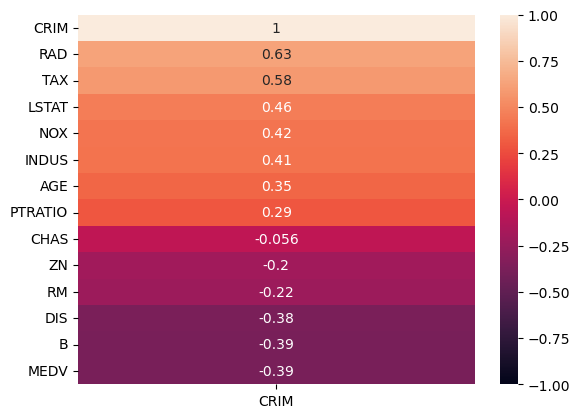

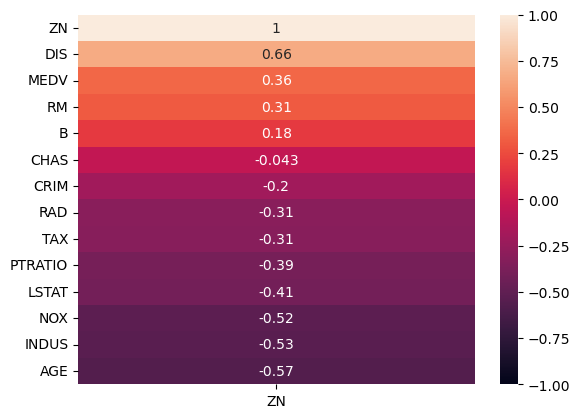

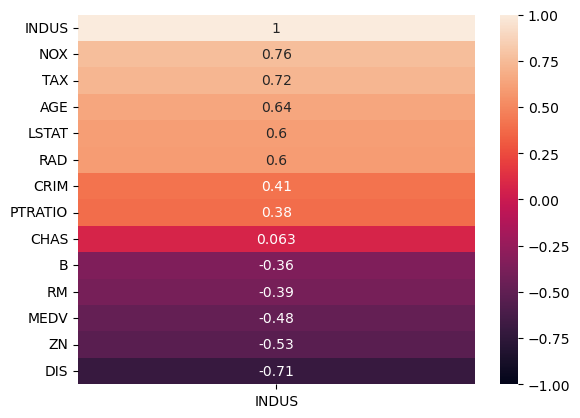

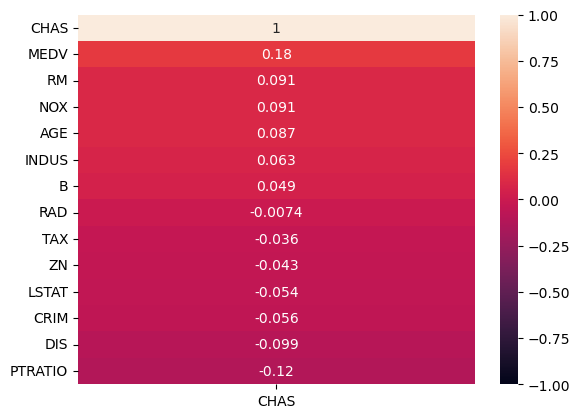

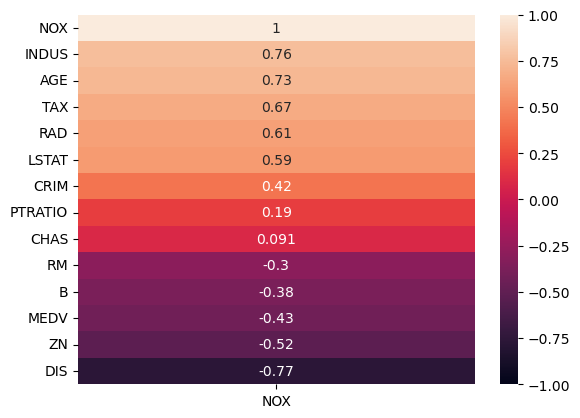

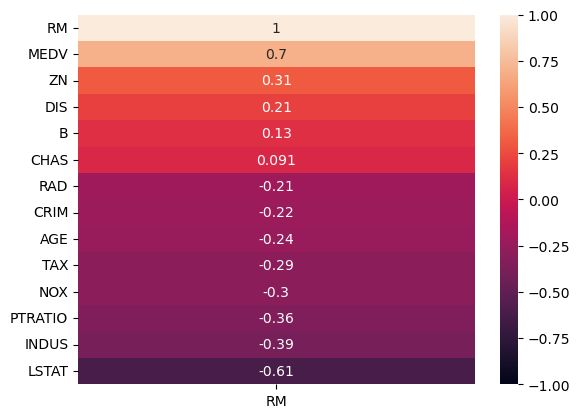

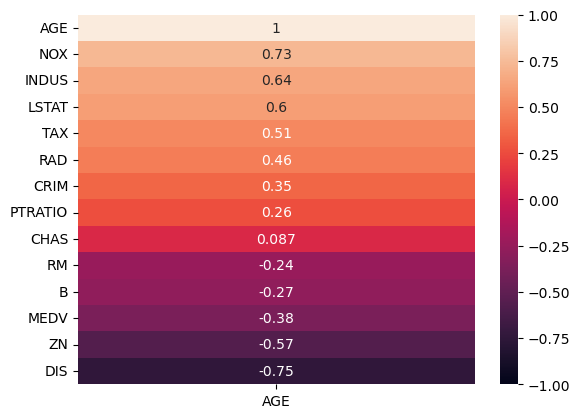

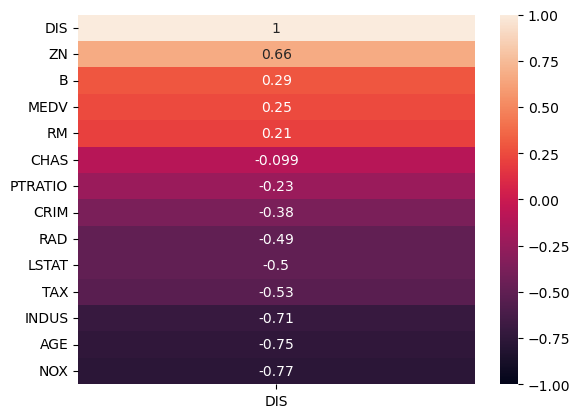

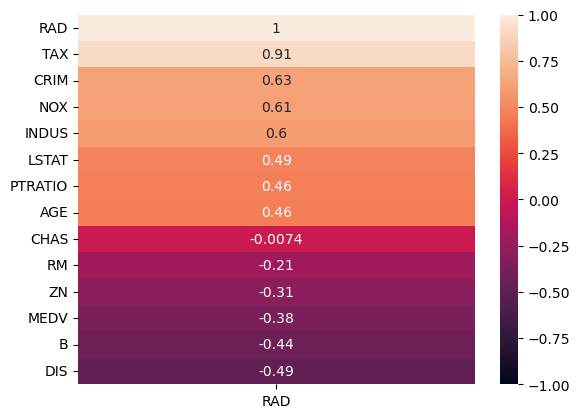

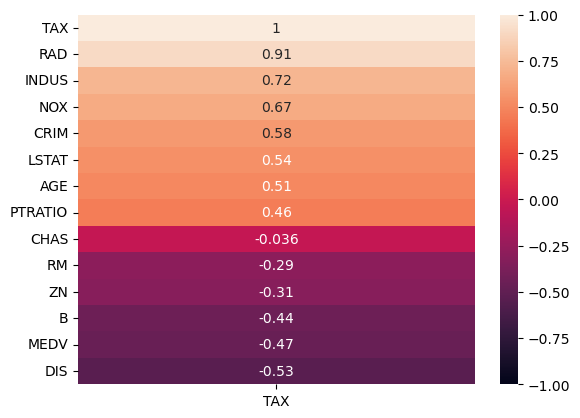

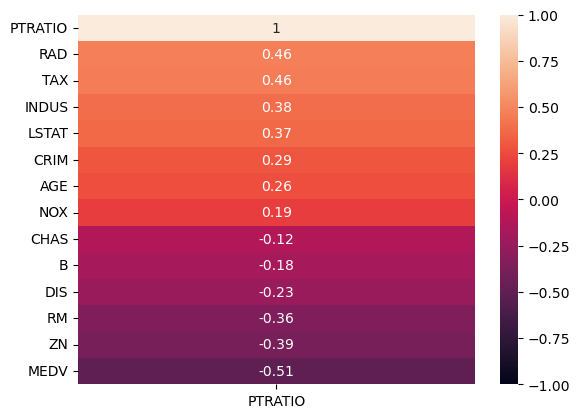

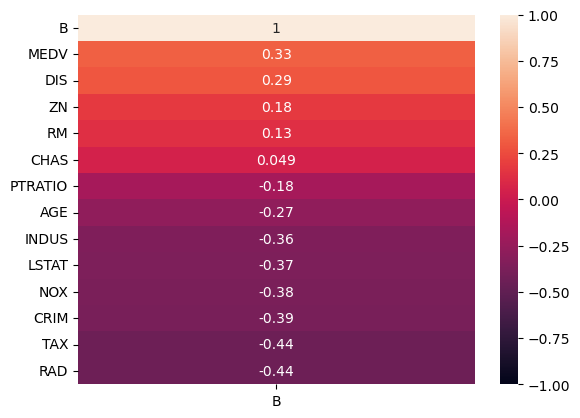

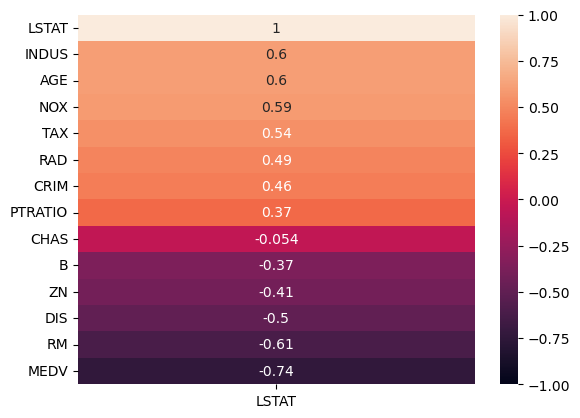

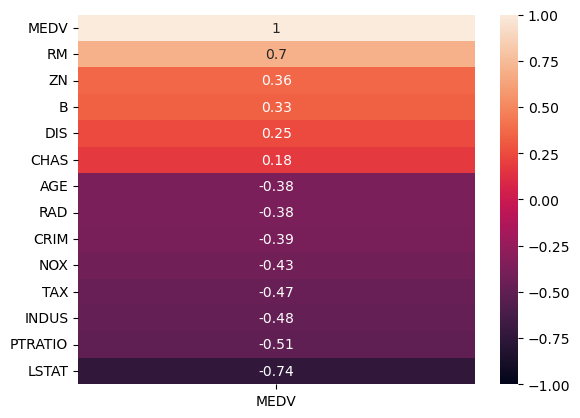

In [7]:
for i in data.columns:
    sns.heatmap(data.corr()[[i]].sort_values(by=i,ascending=False),vmin=-1,vmax=1,annot=True)
    plt.show()

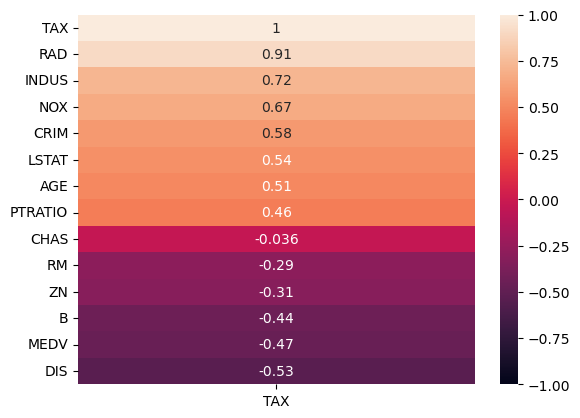

In [8]:
sns.heatmap(data.corr()[['TAX']].sort_values(by='TAX',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

In [9]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [10]:
data1 = data[['RAD','INDUS','TAX']]

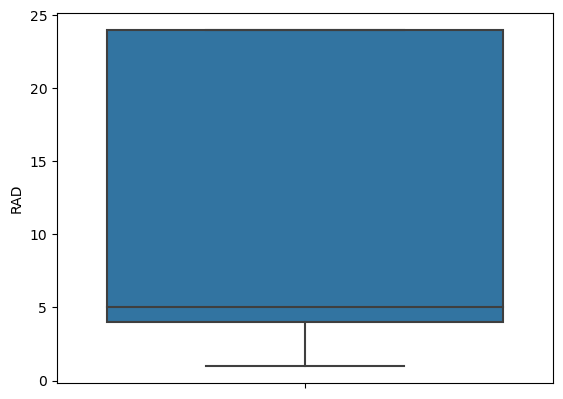

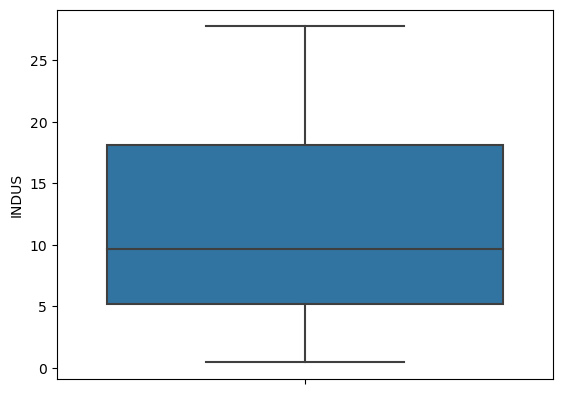

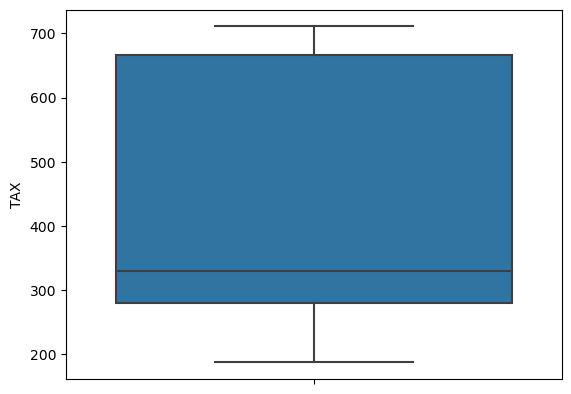

In [11]:
for i in data1.columns:
    sns.boxplot(y=data1[i])
    plt.show()

In [12]:
x = data1.iloc[:,:-1].values
y = data1.iloc[:,-1].values

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=55,shuffle=True)

In [14]:
# sc = StandardScaler()

In [15]:
# x_train =sc.fit_transform(x_train)

In [16]:
# x_test = sc.transform(x_test)

In [17]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    'Lasso':Lasso(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

#### Using a for loop for model training and testing

In [32]:
for i in range(100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=i,shuffle=True)
    for name,model in models.items():
        model.fit(x_train,y_train)
        training_score = model.score(x_train,y_train)*100
        testing_score = model.score(x_test,y_test)*100
        score =r2_score(y_test,model.predict(x_test))*100
        mae = mean_absolute_error(y_test,model.predict(x_test))
        mse = mean_squared_error(y_test,model.predict(x_test))
        rmse = np.sqrt(mse)
    if training_score>99.5 and testing_score>99.5:
        print(i)
        print("model trained with {}".format(name))
        print("training_score: ",training_score)
        print("testing_score: ",testing_score)
    

18
model trained with RandomForestRegressor
training_score:  99.75438332614762
testing_score:  99.7211973468643
21
model trained with RandomForestRegressor
training_score:  99.72062891126127
testing_score:  99.52632975515884
47
model trained with RandomForestRegressor
training_score:  99.67869653176771
testing_score:  99.57239098977193
50
model trained with RandomForestRegressor
training_score:  99.69188964441089
testing_score:  99.73154988004806
54
model trained with RandomForestRegressor
training_score:  99.70702231975028
testing_score:  99.70143744928595
63
model trained with RandomForestRegressor
training_score:  99.7384873894107
testing_score:  99.79308740924316
72
model trained with RandomForestRegressor
training_score:  99.72330462770678
testing_score:  99.727154926792
73
model trained with RandomForestRegressor
training_score:  99.68967902134325
testing_score:  99.65151280097363
99
model trained with RandomForestRegressor
training_score:  99.71682725760715
testing_score:  99.68

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state=72,shuffle=True)

In [34]:
model = RandomForestRegressor()

In [35]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pred = model.predict(x_test)

In [37]:
r2_score(y_test,y_pred)

0.9975876293407074

In [38]:
model.score(x_test,y_test)

0.9975876293407074

In [39]:
model.score(x_train,y_train)

0.9972638079950354

In [40]:
model.score(x_train,y_train)

0.9972638079950354

In [41]:
mean_absolute_error(y_test,y_pred)

2.6917647058823535

In [42]:
mean_squared_error(y_test,y_pred)

64.81665098039218

In [43]:
np.sqrt(mean_squared_error(y_test,y_pred))

8.050878894902853

In [44]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])

In [45]:
Output.head()

,Actual,Prediction
0,276.0,274.44
1,284.0,283.67
2,277.0,277.00
3,666.0,666.00
4,307.0,307.00


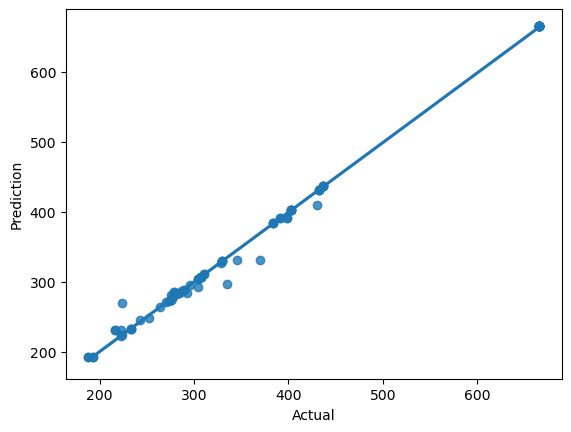

In [46]:
sns.regplot(data=Output,x='Actual',y='Prediction')
plt.show()